## Data Presentation
Name: Trang Hoang

This notebook is used to cleaned the dataset, undergo some prelimary data analysis, and then use geosdata on US states to discuss topics related to number of car accidents and severity of the accident. 

## Motivation: 
By analyzing the geographical distribution and severity of accidents, we gain insight into potential hotspots and areas that require infrastructural or policy interventions. Secondly, understanding disparities between states in terms of accident numbers can guide us in identifying best practices and areas for improvement

### Data Sources: 
In this report, we will have 2 data sets: 
  1. `US_Accidents_March23.csv`: US car accidents from [SOBHAN MOOSAVI](https://arxiv.org/abs/1906.05409):
   The dataset is a countrywide car accident dataset that covers 49 states of the USA from 2016-2023. This data records information  about the time of the accident, the accident location, weather related information (such as temperation, humidity, and wind-direction), and yes/no response to traffic signs. 

  2. `us-states.json`: GeoJSON data of US states from [Kaggle](https://www.kaggle.com/datasets/pompelmo/usa-states-geojson)
  This JSON file contains geographical data about 49 states of USA. The data contains information about each state coordinates, each state full's name and abbreviation. This data will allow us to undergo geospatial analysis on the data


## Data Preprocessing and Data Cleaning

In [ ]:
# Import libraries 
import pandas as pd
import numpy as np
import json
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import geoplot as gplt 
import geoplot.crs as gcrs
import warnings
import zipfile

current_wd=os.getcwd()


#### Load Data
Load both of the datasets

In [ ]:
# Extract the data.zip folder

# Path to the zip file
zip_path = f"{current_wd}/us_car_accidents_2020-2023.csv.zip"

# Directory to extract to
extract_to = f"{current_wd}/data"
# Unzipping the folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [ ]:
# Loading US Accidents data
df= pd.read_csv(f"{current_wd}/data/us_car_accidents_2020-2023.csv")

#Load US Geo data
with open(f"{current_wd}/data/us-states.json", encoding='utf8') as code:
    usa_states = json.load(code)

In [ ]:
df.head()

Unnamed: 0        ID   Source  Severity           Start_Time  \
0           0  A-512230  Source2         1  2022-09-08 05:49:30   
1           1  A-512231  Source2         1  2022-09-08 02:02:05   
2           2  A-512232  Source2         1  2022-09-08 05:14:12   
3           3  A-512233  Source2         1  2022-09-08 06:22:57   
4           4  A-512234  Source2         2  2022-09-08 06:36:20   

              End_Time  Start_Lat   Start_Lng  End_Lat  End_Lng  ...  \
0  2022-09-08 06:34:53  41.946796  -88.208092      NaN      NaN  ...   
1  2022-09-08 04:31:32  34.521172 -117.958076      NaN      NaN  ...   
2  2022-09-08 07:38:17  37.542839  -77.441780      NaN      NaN  ...   
3  2022-09-08 06:52:42  40.896629  -81.178452      NaN      NaN  ...   
4  2022-09-08 07:05:58  41.409359  -81.644318      NaN      NaN  ...   

   Airport_Code    Weather_Timestamp Temperature(F) Wind_Chill(F) Humidity(%)  \
0          KDPA  2022-09-08 05:52:00           58.0          58.0        90.0   
1          KPMD  2022-09-08 01:53:00           86.0          86.0        28.0   
2          KRIC  2022-09-08 05:16:00           68.0          68.0        96.0   
3          KCAK  2022-09-08 06:51:00           62.0          62.0        86.0   
4          KBKL  2022-09-08 06:53:00           63.0          63.0        87.0   

  Pressure(in) Visibility(mi) Wind_Direction Wind_Speed(mph) Precipitation(in)  
0        29.24           10.0           CALM             0.0               0.0  
1        27.35           10.0              W             6.0               0.0  
2        29.71           10.0              N             8.0               0.0  
3        28.71            7.0            NNE             6.0               0.0  
4        29.37            7.0            SSE             3.0               0.0  

[5 rows x 29 columns]

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Source', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

In [ ]:
df['Street'][isin].value_counts()

Street
I-95 S                       49457
I-95 N                       47215
I-5 N                        37271
I-10 E                       34048
I-5 S                        33858
                             ...  
 Gatemore Rd                     1
Mid Ocean Cir                    1
Benbow Ct                        1
Martin Marietta Access Rd        1
 Liman Ave                       1
Name: count, Length: 268285, dtype: int64

US States GeoData

/Users/tranghoang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Users/tranghoang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


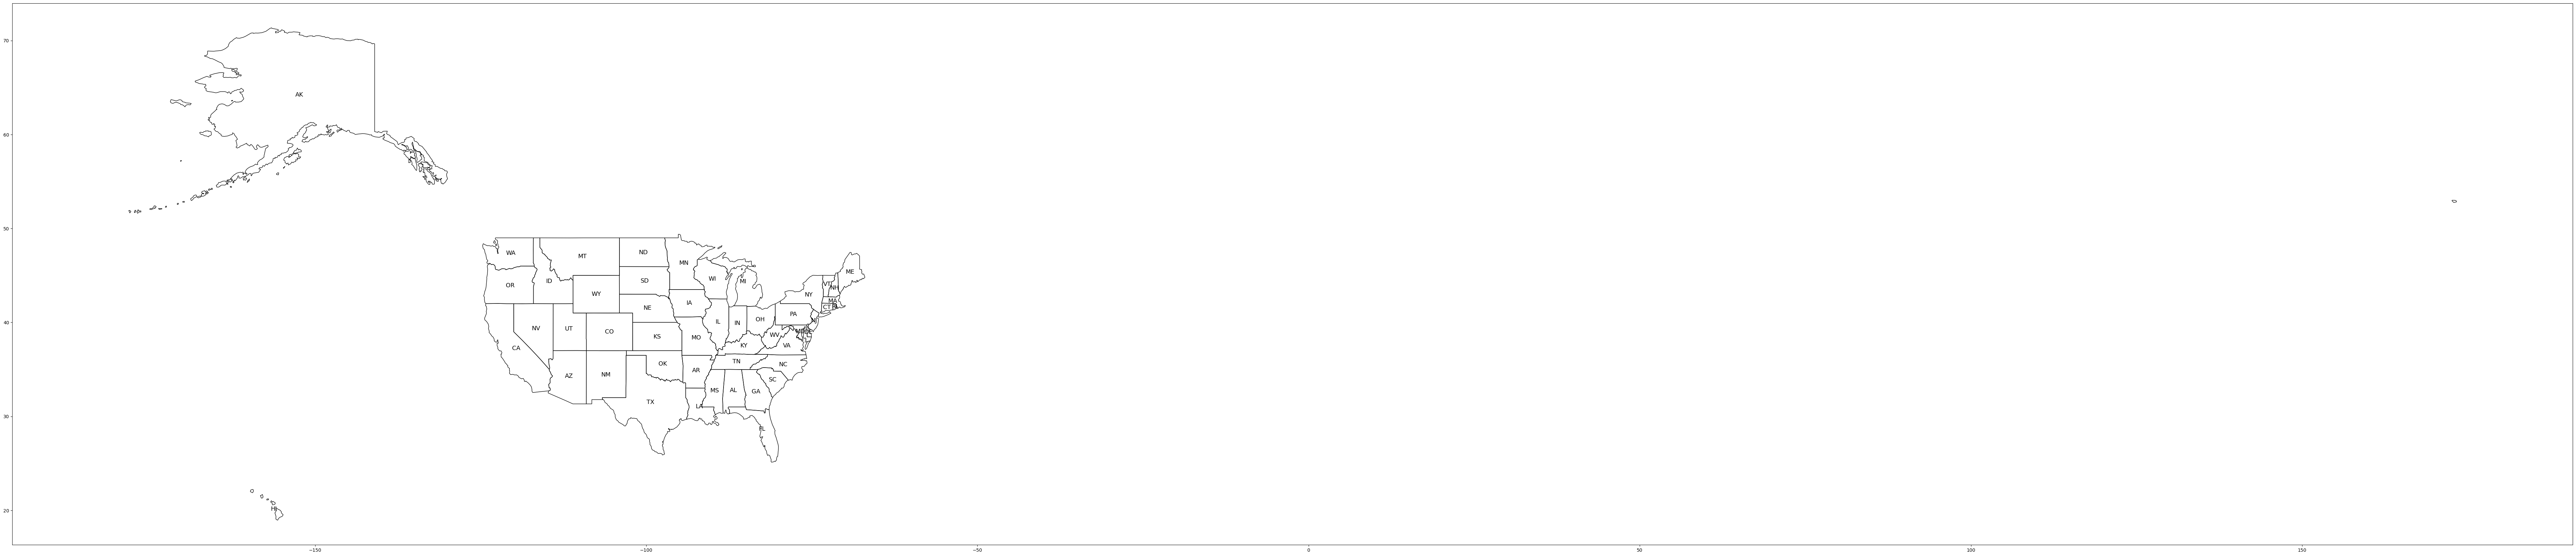

In [ ]:
# Step 1: Read the GeoJSON Data
geojson_path = f'{current_wd}/data/us-states.json'
us_states_gdf = gpd.read_file(geojson_path)

# Create a plot
ax = us_states_gdf.plot(figsize=(100, 100), edgecolor='k', facecolor='none')

state_abbr=[]
x_coor=[]
y_coor=[]
for feature in usa_states['features']:
    state_name = feature['properties']['name']
    state_abbr.append(feature['id'])# Assuming the abbreviation is in the GeoJSON properties
    centroid = gpd.GeoDataFrame.from_features([feature]).geometry.centroid
    x_coor.append(centroid.geometry.x)
    y_coor.append(centroid.geometry.y)

# Add labels to the plot
for x, y, label in zip(x_coor, y_coor, state_abbr):
    ax.text(x, y, label, fontsize=13, ha='center', va='center')
    
# Export the map
plt.savefig('us_states_gdf.jpg')

warnings.filterwarnings('ignore')


#### Data Cleaning: 
Our next step is to remove unnecessary columns, handle missing values, and check on the data columns's type

1. Remove unnecessary columns: This table is relatively large so I am going to remove some columns that I won't be using. The final column lists would be. I am removing `End_Lat` and `End_Lng` because we can use the `Start_Lat` and `Start_Lng` to map with the US states Geo Json Files

These are the columns that I will keep:

- 'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat','Start_Lng', 'Distance(mi)', 'Description','Street', 'City', 'County', 'State', 'Zipcode', 'Country','Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)', 'Precipitation(in)'

2. Make changes on column's types:
- `Start_Time` and `End_Time` is in Object Type, I want to change it to datetime for easy analysis  

3. Filter out data to only include US car accidents from 2022 until March 2023

4. Handle Missintg Values median or mean imputation by city 


In [ ]:
# Remove Unnecessary Columns
selected_columns = ['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat','Start_Lng'
                    , 'Distance(mi)', 'County', 'State', 'Zipcode'
                    , 'Country','Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)'
                    , 'Precipitation(in)']
df_processed= df.copy()

df_processed= df[selected_columns]
df_processed['Start_Time'] = pd.DatetimeIndex(df_processed['Start_Time'])
df_processed['End_Time'] = pd.DatetimeIndex(df_processed['End_Time'])

In [ ]:
#Filter Car Accidents from 2022-2023 
df_processed_filter=df_processed[(df_processed['Start_Time'].dt.year >=2022) & (df_processed['Start_Time'].dt.year<=2023)]
df_processed_filter.shape


(2009085, 15)

<Axes: >

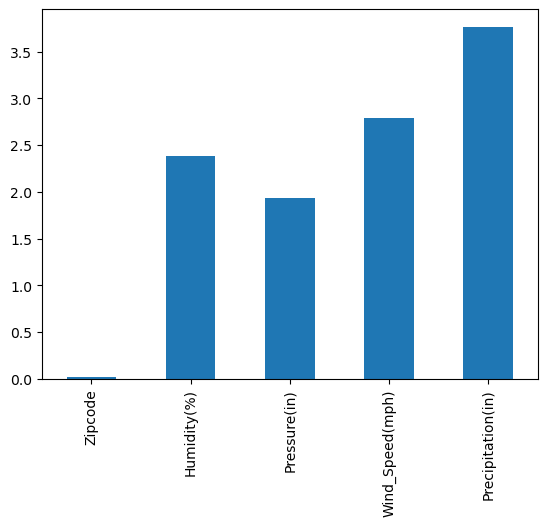

In [ ]:
# Handling Missing Data
percentage_of_missing_values=df_processed_filter.isna().sum()/len(df_processed_filter)*100
percentage_of_missing_values[percentage_of_missing_values!=0].plot(kind="bar")

**Observation on missing data:**
- There are several columns with missing values that need to be addressed, such as `Street`, `Zipcode`, and `City`. I will keep the NA values as it is and not impute them 

- I will choose mean imputation for `Humidity`, `Pressure`, `Wind_Speed` and `Precipitation`

In [ ]:

imputed_columns = ['Humidity(%)', 'Pressure(in)'
                   ,'Wind_Speed(mph)', 'Precipitation(in)']

# Mean imputation on all the numeric weather columns
for col in imputed_columns:
    df_processed_filter.loc[:,col] = df_processed_filter[col].fillna(df_processed_filter[col].mean())


In [ ]:
df_processed_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009085 entries, 0 to 2939417
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   End_Time           datetime64[ns]
 4   Start_Lat          float64       
 5   Start_Lng          float64       
 6   Distance(mi)       float64       
 7   County             object        
 8   State              object        
 9   Zipcode            object        
 10  Country            object        
 11  Humidity(%)        float64       
 12  Pressure(in)       float64       
 13  Wind_Speed(mph)    float64       
 14  Precipitation(in)  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(5)
memory usage: 245.2+ MB


In [ ]:
df_processed_filter.describe()

Severity                     Start_Time  \
count  2.009085e+06                        2009085   
mean   2.070058e+00  2022-07-24 14:46:14.450365696   
min    1.000000e+00            2022-01-01 00:02:00   
25%    2.000000e+00            2022-04-11 08:24:47   
50%    2.000000e+00            2022-07-18 19:36:00   
75%    2.000000e+00            2022-11-12 00:27:00   
max    4.000000e+00            2023-03-31 23:30:00   
std    3.911021e-01                            NaN   

                            End_Time     Start_Lat     Start_Lng  \
count                        2009085  2.009085e+06  2.009085e+06   
mean   2022-07-24 20:01:11.382659584  3.603199e+01 -9.362094e+01   
min              2022-01-01 00:31:30  2.455480e+01 -1.245410e+02   
25%              2022-04-11 12:26:09  3.321808e+01 -1.170936e+02   
50%              2022-07-19 07:08:00  3.601536e+01 -8.535528e+01   
75%              2022-11-12 09:49:00  4.000991e+01 -8.014414e+01   
max              2023-03-31 23:59:00  4.900050e+01 -6.828378e+01   
std                              NaN  5.138821e+00  1.747926e+01   

       Distance(mi)   Humidity(%)  Pressure(in)  Wind_Speed(mph)  \
count  2.009085e+06  2.009085e+06  2.009085e+06     2.009085e+06   
mean   9.252092e-01  6.283107e+01  2.934924e+01     7.694161e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00     0.000000e+00   
25%    5.900000e-02  4.600000e+01  2.919000e+01     5.000000e+00   
50%    2.640000e-01  6.300000e+01  2.969000e+01     7.000000e+00   
75%    9.720000e-01  8.200000e+01  2.996000e+01     1.000000e+01   
max    3.365700e+02  1.000000e+02  5.863000e+01     1.900000e+02   
std    2.060063e+00  2.278440e+01  1.147909e+00     5.507685e+00   

       Precipitation(in)  
count       2.009085e+06  
mean        5.798209e-03  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         3.647000e+01  
std         4.945390e-02

## Data Exploratory 
- Columns' definition: 
1. `Start_Time`: Shows start time of the accident in local time zone.
2. `Severity`: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
3. `State`: Shows the state where the accidents taken place	
4. `Start_Lng`: Shows longitude in GPS coordinate of the start point.	
5. `Start_Lat`: Shows latitude in GPS coordinate of the start point.	


- Looking at the statistic description of the dataset

In [ ]:
# Copy dataframe for analysis 
df_work=df_processed_filter[['Start_Time','Severity','State','Start_Lng','Start_Lat']].copy()

#Take a look at the data statistics description

In [ ]:
df_work.describe()

Start_Time      Severity     Start_Lng     Start_Lat
count                        2009085  2.009085e+06  2.009085e+06  2.009085e+06
mean   2022-07-24 14:46:14.450365696  2.070058e+00 -9.362094e+01  3.603199e+01
min              2022-01-01 00:02:00  1.000000e+00 -1.245410e+02  2.455480e+01
25%              2022-04-11 08:24:47  2.000000e+00 -1.170936e+02  3.321808e+01
50%              2022-07-18 19:36:00  2.000000e+00 -8.535528e+01  3.601536e+01
75%              2022-11-12 00:27:00  2.000000e+00 -8.014414e+01  4.000991e+01
max              2023-03-31 23:30:00  4.000000e+00 -6.828378e+01  4.900050e+01
std                              NaN  3.911021e-01  1.747926e+01  5.138821e+00

- Number of accidents by US states: 

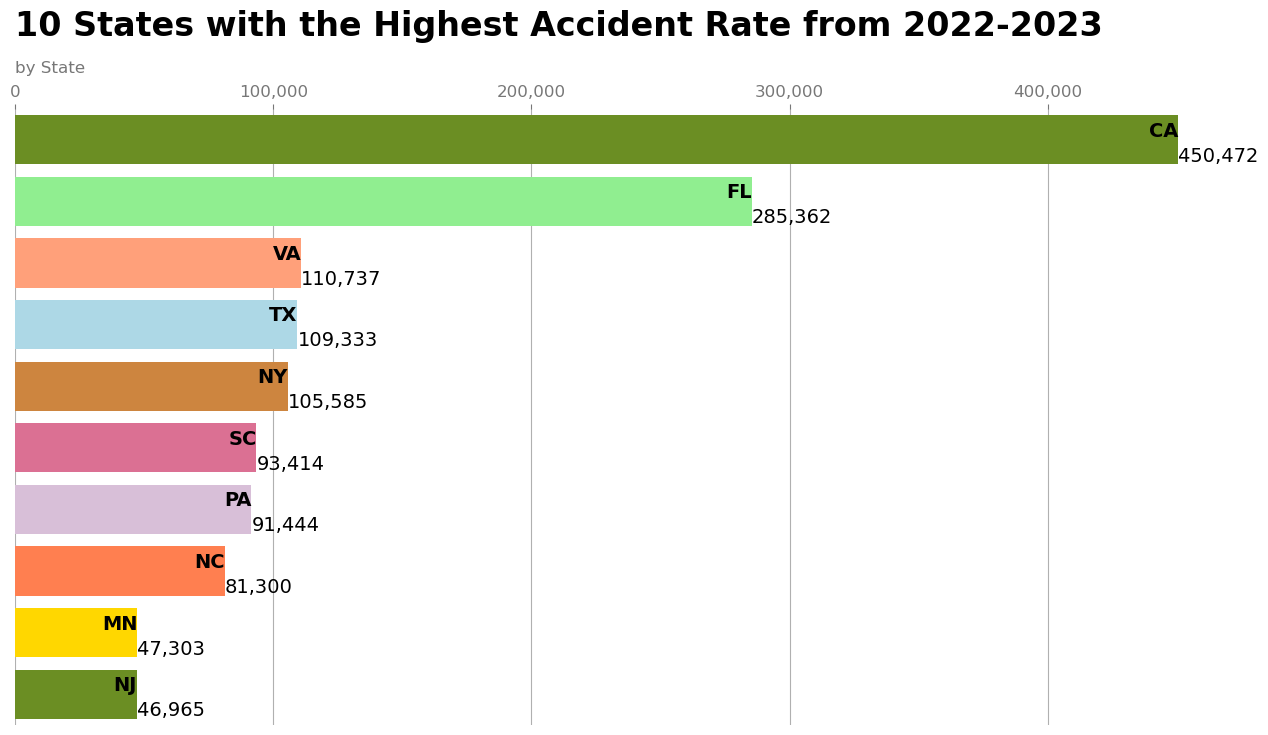

In [ ]:

df_st = df_work.groupby('State').size().to_frame('Counts')
df_st = df_st.reset_index().sort_values('Counts', ascending = False)[:10]
df_st = df_st[::-1]   # flip values from top to bottom

colors = ['olivedrab', 'gold', 'coral', 'thistle',
     'palevioletred', 'peru', 'lightblue', 'lightsalmon', 'lightgreen']

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(df_st['State'], df_st['Counts'], color = colors)

for i, (value, name) in enumerate(zip(df_st['Counts'], df_st['State'])):
        ax.text(value, i, name, size=14, weight=600, ha='right', va='bottom')
        ax.text(value, i-.25, f'{value:,.0f}',  size=14, ha='left',  va='center')
        
# ... polished styles
#ax.text(1, 0.4, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
ax.text(0, 1.06, 'by State', transform=ax.transAxes, size=12, color='#777777')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.set_yticks([])
ax.margins(0, 0.01)
ax.grid(which='major', axis='x', linestyle='-')
ax.set_axisbelow(True)
ax.text(0, 1.12, '10 States with the Highest Accident Rate from 2022-2023',
            transform=ax.transAxes, size=24, weight=600, ha='left')

plt.box(False)

fig.savefig(f"{current_wd}/reporting_by_state.png", dpi=300)

**Observations:**
- California (CA) has the highest number of accidents with a staggering 450,472 accidents, California far outpaces the other states in terms of the number of accidents. This could be due to a variety of factors including its large population, extensive road network, and high traffic density.

- Florida (FL) also has significant numbers of accidents: This state has recorded 285,362 car accidents respectively. Like California, these states also have large populations and extensive road networks, which might contribute to the high number of accidents.

- There is a noticeable drop in the number of accidents when moving from Florida (the third highest) to Virginia (the fourth highest), from 285,362 to 110,737. This highlights a significant disparity in accident rates among the top states.

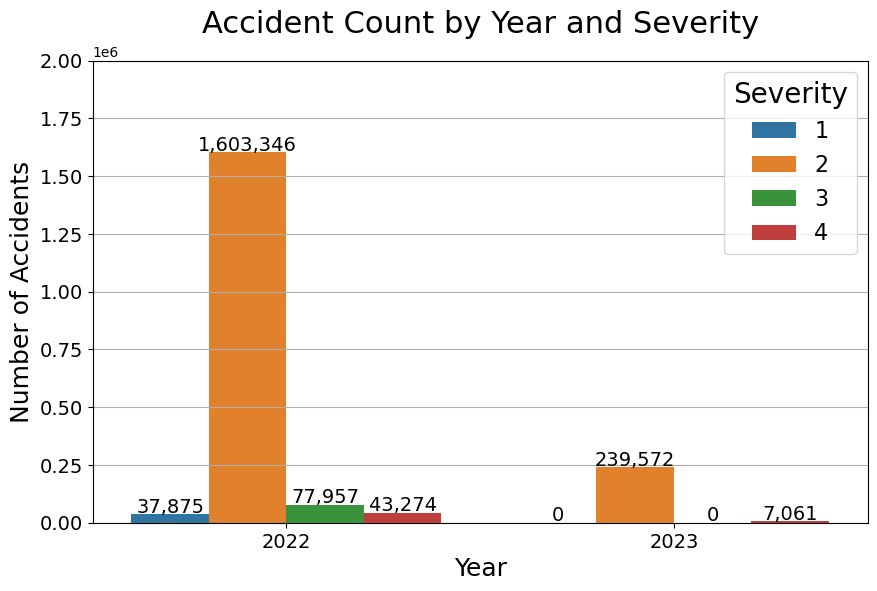

In [ ]:
# Accident Severity throughout 2022-2023
df_work['Year'] = df_work["Start_Time"].dt.year

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_work, x='Year', hue='Severity')

# Add count annotations with formatted numbers
annotation_fontsize = 14  # Adjust as needed
for p in ax.patches:
    count = int(p.get_height())
    formatted_count = '{:,.0f}'.format(count)  # Format the count with commas
    ax.annotate(formatted_count, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=annotation_fontsize, color='black', xytext=(0, 5),
                textcoords='offset points')
# Add grids
ax.yaxis.grid(True)

# Set plot title and labels
title_fontsize = 22  # Adjust as needed
label_fontsize = 18  # Adjust as needed
title_pad = 20  

plt.title('Accident Count by Year and Severity', fontsize=title_fontsize,  pad=title_pad)
plt.xlabel('Year', fontsize=label_fontsize)
plt.ylabel('Number of Accidents', fontsize=label_fontsize)

# Set tick parameters
tick_labelsize = 14  # Adjust as needed
ax.tick_params(axis='both', which='major', labelsize=tick_labelsize)
ax.set_ylim(0, 2000000)

# Set legend properties
legend_title_fontsize = 20  # Adjust as needed
legend_label_fontsize = 16  # Adjust as needed
plt.legend(title='Severity', title_fontsize=legend_title_fontsize, fontsize=legend_label_fontsize)

# Export the images
plt.savefig('accident_count_by_year_and_severity.png', bbox_inches='tight')
plt.show()

**Summary:** 
- Severity of type 2 dominates: Accidents with severity level 2 are the most common in both years, significantly outnumbering accidents of other severity levels. 

- Low count of high severity accidents: Accidents with severity levels 3 and 4 are relatively rare in comparison to lower severity levels. 

- The distribution of accident severity levels remains consistent from 2022 to 2023, with severity level 2 accidents being the most common, followed by severity levels 1, 3, and 4. This consistency might indicate stable conditions in terms of road safety and accident severity

## GeoSpatial Data Analysis 
- Creates multiple maps to see the number of car accidents

In [ ]:
# Preparing the data for the plot
state_counts = df_work['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Creating the choropleth map using Plotly Express
fig = px.choropleth(
    data_frame=state_counts,  # Data containing the number of accidents
    geojson=usa_states,  # GeoJSON data for USA states
    color='Count',  # Column representing the number of accidents
    locations='State',  # Column with state names or codes
    color_continuous_scale="Reds",  # Color scale for the choropleth map
    scope="usa",  # Focus the map on the USA
    labels={'Count':'Number of Accidents'}  # Label for the color bar
)

# Update the layout for better presentation
fig.update_geos(
    fitbounds="locations",  # Fit the geographical elements within the view
    visible=False  # Hide geographical elements borders
)
fig.update_layout(
    margin={"r":0, "t":40, "l":0, "b":0},  # Adjust margins to fit title
    title_text='Number of Car Accidents by States in 2022- March 2023',  # Adding a title
    title_x=0.5,  # Centering the title
    title_font=dict(size=20),  # Adjusting the font size of the title
    title_y=0.98,  # Adjusting the position of the title
    geo=dict(
        showland=True, 
        landcolor="white"
    )
)

In [ ]:
#export fig
fig.write_image(f"{current_wd}/num_car_accident_2022_2023.png") 

**Observation:**
- California's high number of accidents: California stands out with the darkest shade, indicating it has the highest number of car accidents, approaching 450k during the specified period.

- Southern States: States such as Texas and Florida also have a relatively higher number of car accidents, though not as high as California. They fall within the 200k to 350k range for Florida and 100k-150k range for Texas.

- Lower accident density in the north: The majority of the northern states, including those in the Midwest and Northeast, exhibit a much lighter shade, indicating a lower number of car accidents, possibly below 100k during this period.

Determining Severity of the Accidents on maps

Total number of accidents: 200908


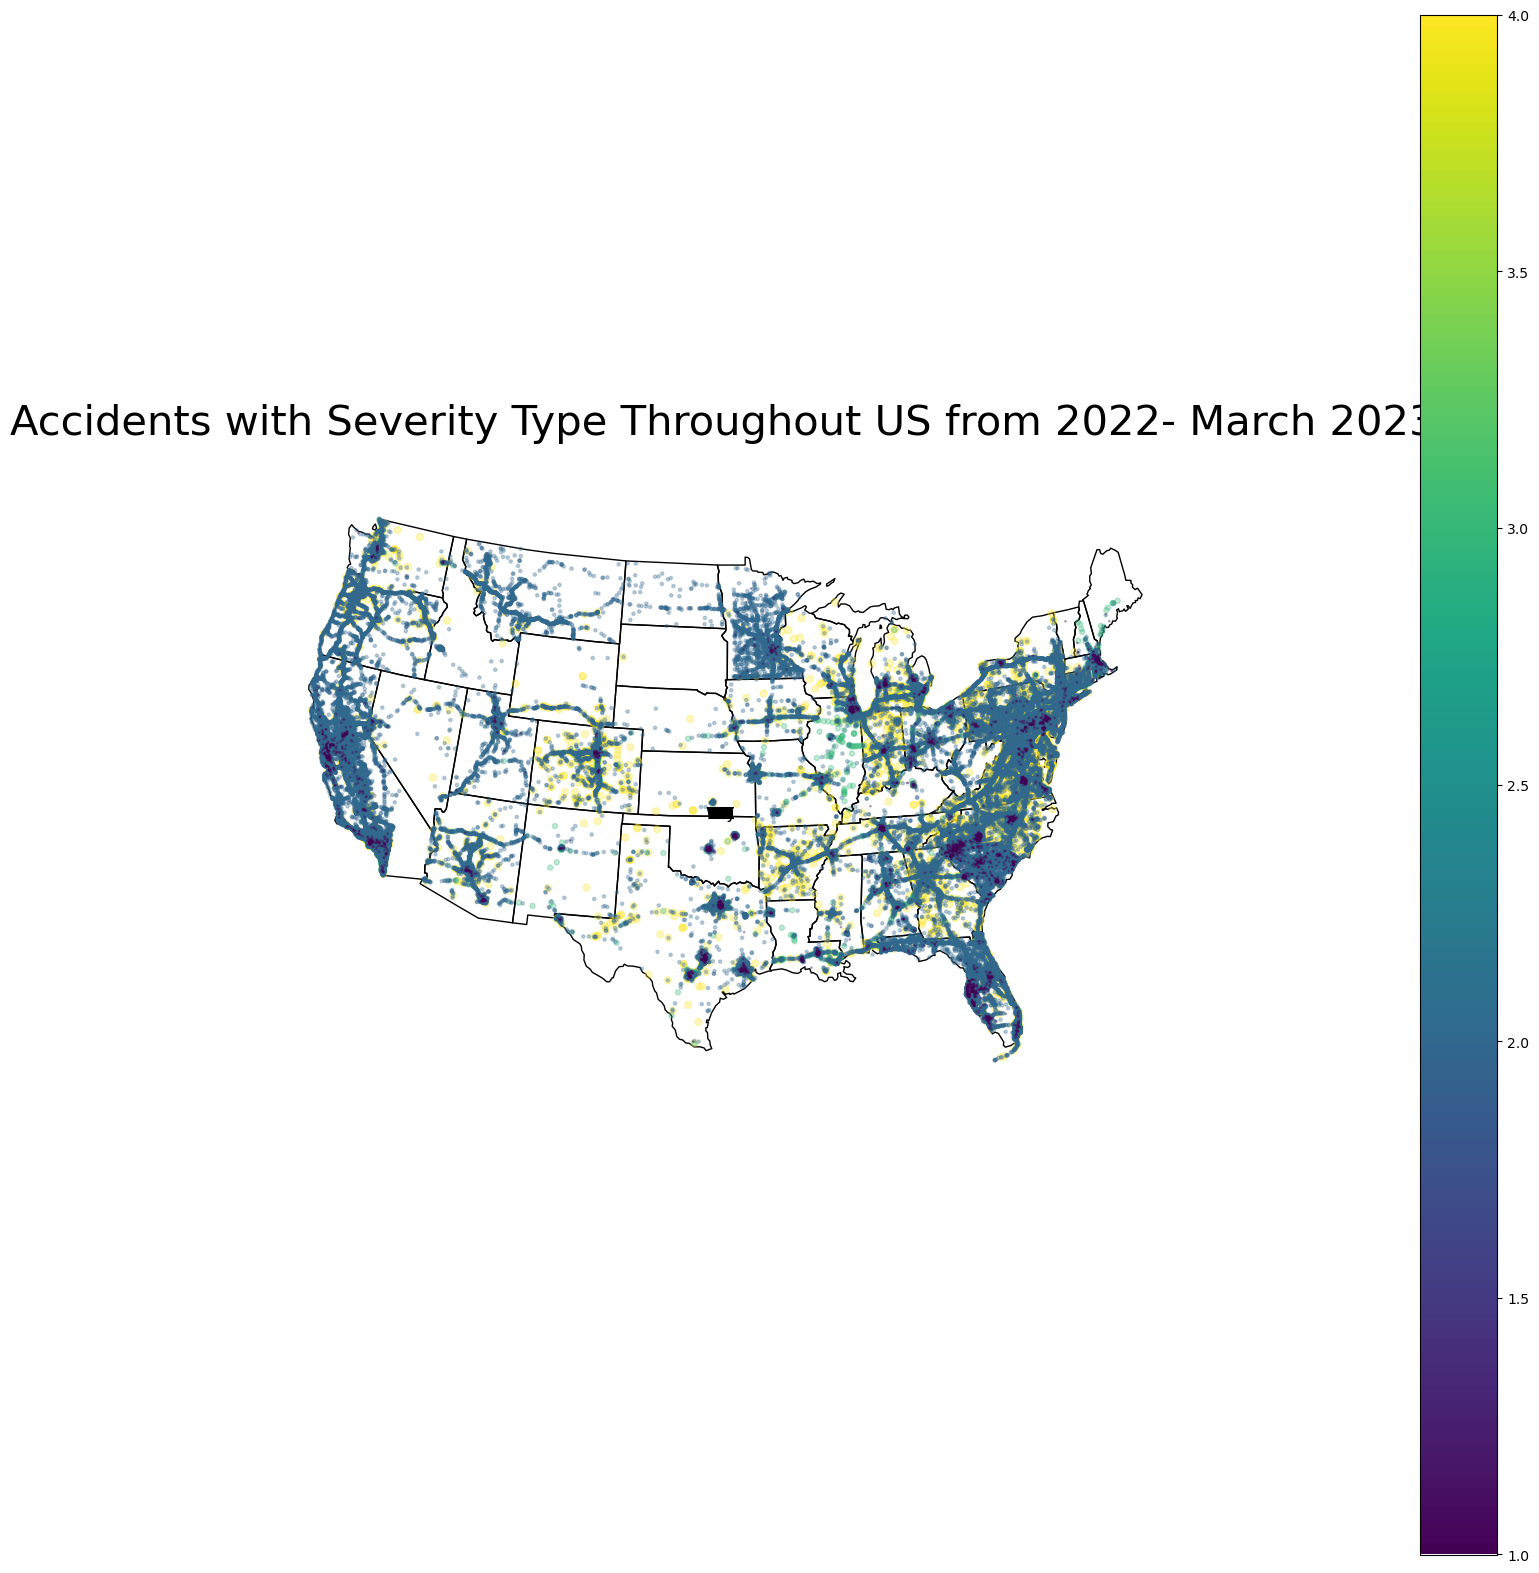

In [ ]:
#Load data 
severity = df_work[['Severity','Start_Lng','Start_Lat']]
gdf_severity = gpd.GeoDataFrame(
    severity, geometry=gpd.points_from_xy(severity.Start_Lng, severity.Start_Lat))

#All Severity types
#generate map with hue based on severity
gdfs_sample = gdf_severity.sample(int(len(gdf_severity)/10))
print('Total number of accidents: {}'.format(int(len(gdfs_sample))))

# Plot the map
ax = gplt.polyplot(
    us_states_gdf,
    projection=gcrs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5),
    figsize=(20, 20)
)

# Add state abbreviation 
for label, x, y in zip(state_abbr, x_coor, y_coor):
    ax.text(x, y, label, fontsize=12, ha='right', va='top')

gplt.pointplot(
    gdfs_sample,
    ax=ax,
    hue='Severity',
    scale='Severity',
    legend=True,
    legend_var='hue', 
    alpha=0.3
)
ax.set_title('Accidents with Severity Type Throughout US from 2022- March 2023', fontsize=30)
plt.savefig('accident_severity.jpg')
plt.show()


**Observations:**
- High concentration in specific regions: The eastern coast, especially areas around the northeast and southeast, display a higher concentration of accidents. Similarly, the western coast, particularly in California, also shows a dense cluster of accidents.
- Color Intensity: The intensity of the color in the choropleth map would correspond to the number of accidents, with darker shades indicating a higher number of accidents. This visual cue helps to quickly identify areas with the most significant road safety issues
- Severity gradient: The color gradient indicates that most of the accidents across the country fall within the lower severity range (1.0-2.0). There are fewer instances of extremely severe accidents (3.0-4.0) compared to less severe ones.
- If you notice the dots connect/form major highways of the US. Most of the accidents are in the big major highways of US.